## ROSSMAN

Estudiante: Rodrigo Mauricio Garcia Saenz

### 1. Quitar filas duplicadas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
import seaborn as sb
import os
dtset = pd.read_csv('RossmanDataV1.csv')
dtset.head(10)

Store  DayOfWeek      Date  Sales  Customers  Open  Promo StateHoliday  \
0    107          6   5/23/15   3918        378     1      0            0   
1    492          3    6/5/13   8856        901     1      1            0   
2     57          1  12/30/13   5940        577     1      0            0   
3    260          5    1/2/15   4311        439     1      0            0   
4    932          4    4/4/13   3294        345     1      0            0   
5    199          4  10/23/14   3852        417     1      1            0   
6    139          5  10/31/14      0          0     0      0            a   
7    171          6   7/26/14   2389        246     1      0            0   
8    743          2   2/17/15   4854        458     1      1            0   
9    358          7    2/3/13      0          0     0      0            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              0         d          a                    0   
1              0         d          a                    0   
2              1         a          c                    0   
3              1         a          c                    0   
4              1         d          a                    0   
5              1         a          c                    0   
6              1         d          a                    0   
7              0         a          c                    0   
8              0         a          c                    0   
9              0         d          a                    0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        0.0                       0.0       1   
1                        0.0                       0.0       0   
2                        0.0                       0.0       0   
3                        0.0                       0.0       0   
4                        0.0                       0.0       1   
5                        0.0                       0.0       0   
6                        0.0                       0.0       0   
7                        0.0                       0.0       0   
8                        0.0                       0.0       0   
9                        0.0                       0.0       1   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              5.0           2013.0  Feb,May,Aug,Nov  
1              NaN              NaN              NaN  
2              NaN              NaN              NaN  
3              NaN              NaN              NaN  
4              5.0           2013.0  Feb,May,Aug,Nov  
5              NaN              NaN              NaN  
6              NaN              NaN              NaN  
7              NaN              NaN              NaN  
8              NaN              NaN              NaN  
9              5.0           2013.0  Feb,May,Aug,Nov

In [2]:
dtset.drop_duplicates(subset=None, inplace=True)

### 2. Quitar columnas duplicadas 

In [3]:
# Eliminar las columnas duplicadas
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [4]:
duplicateColumnNames = getDuplicateColumns(dtset)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows


In [5]:
newDf = dtset.drop(columns=getDuplicateColumns(dtset))
newDf.head(1)

Store  DayOfWeek     Date  Sales  Customers  Open  Promo StateHoliday  \
0    107          6  5/23/15   3918        378     1      0            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              0         d          a                    0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        0.0                       0.0       1   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              5.0           2013.0  Feb,May,Aug,Nov

### 3. Identificar columnas que tienen valores constantes

In [6]:
def get_constant_columns(dataframe):
    constantColumns = set()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1: # un solo valor unico
            # print(dataframe[column])
            constantColumns.add(column)
    return constantColumns

### 4. Identifique el porcentaje de valores faltantes en las columnas

In [7]:
# 4. Identifique el porcentaje de valores faltantes en las columnas
total = newDf.isnull().sum().sort_values(ascending=False)
percent = (newDf.isnull().sum()/newDf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
PromoInterval               2497   0.4994
Promo2SinceWeek             2497   0.4994
Promo2SinceYear             2497   0.4994
CompetitionOpenSinceYear    1529   0.3058
CompetitionOpenSinceMonth   1529   0.3058
Promo                          0   0.0000
DayOfWeek                      0   0.0000
Date                           0   0.0000
Sales                          0   0.0000
Customers                      0   0.0000
Open                           0   0.0000
SchoolHoliday                  0   0.0000
StateHoliday                   0   0.0000
StoreType                      0   0.0000
Assortment                     0   0.0000
CompetitionDistance            0   0.0000
Promo2                         0   0.0000
Store                          0   0.0000

### 5. Analice el caso de los atributos por medio de gráficas Cuales decidiría usted de transformar o en su caso quitar, con el propósito de mejorar el dataset.

Genere las siguientes gráficas:

  a. Histograms
  
  b. Quartiles
  
  c. Scatter plots
  
  d. Distributions
  
  e. Heartmaps

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3cf2a6050>,
      dtype=object)

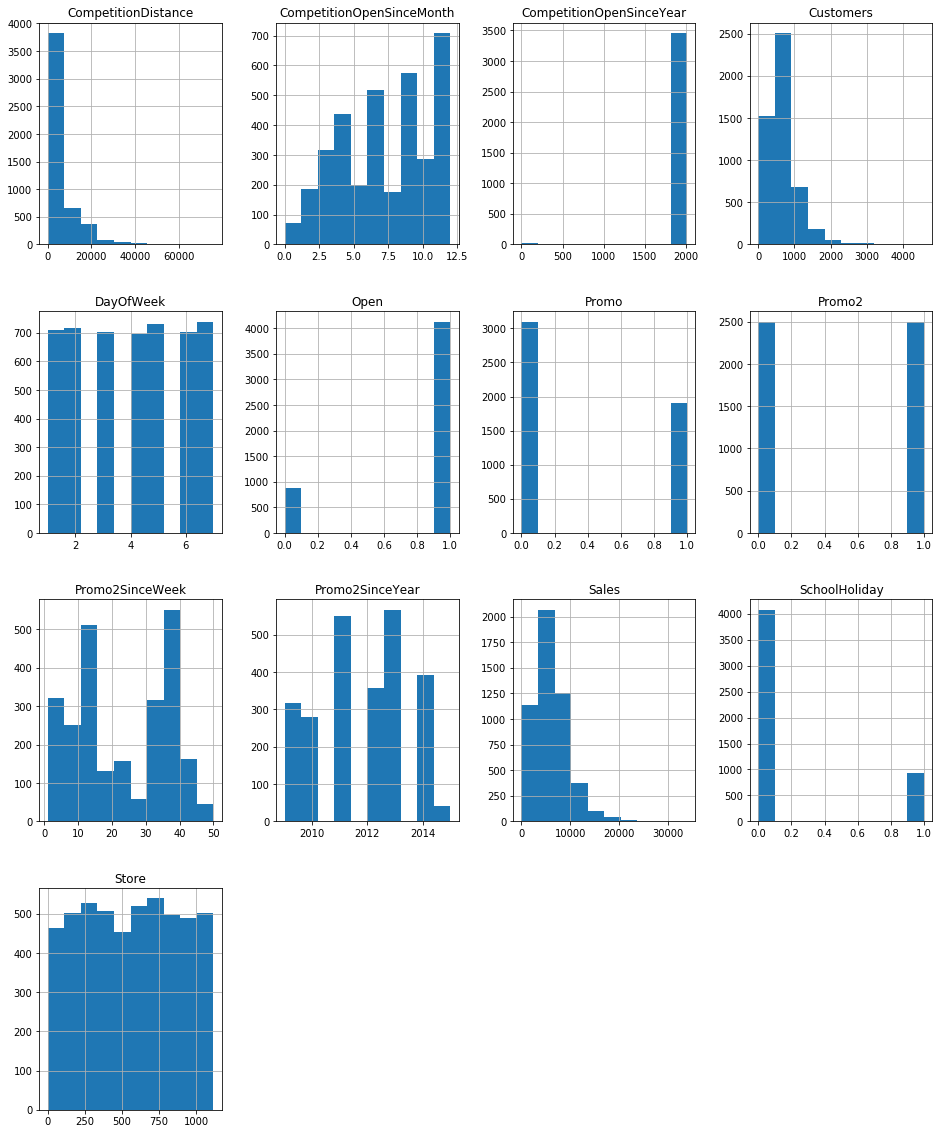

In [8]:
# a. Histograms
newDf.columns.values
newDf.hist(figsize=(16, 20)) #, xlabelsize=8, ylabelsize=8)

En las gráficas de histogramas la columna "CompetitionOpenSinceYear" no tiene cambios, por lo que conviene quitarla.

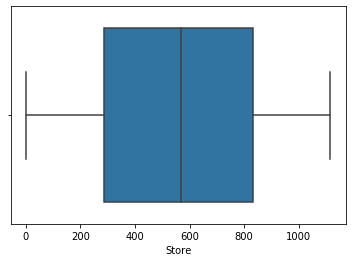

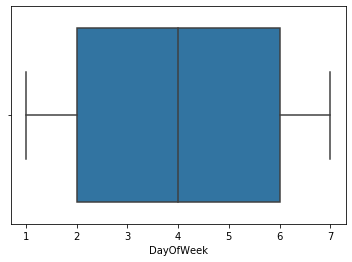

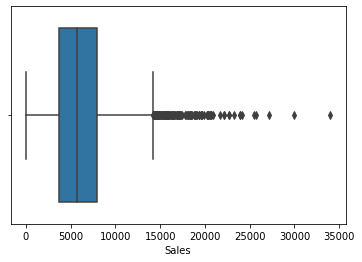

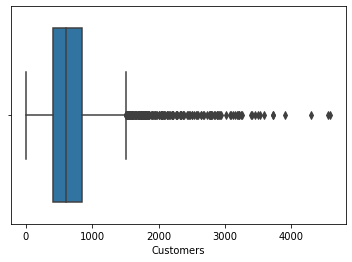

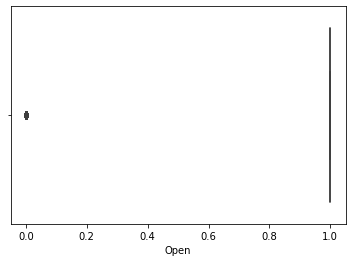

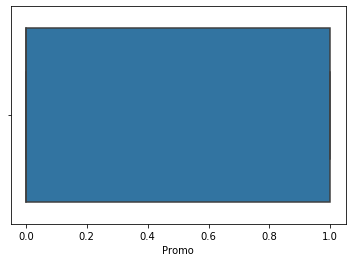

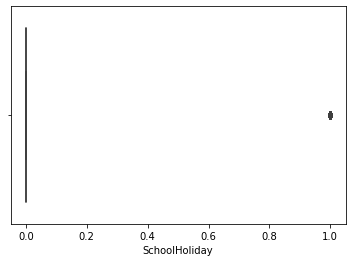

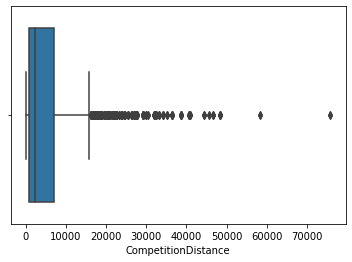

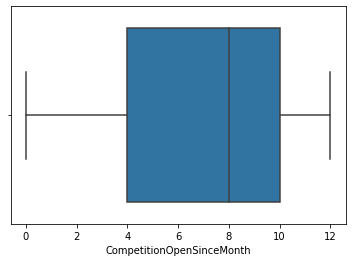

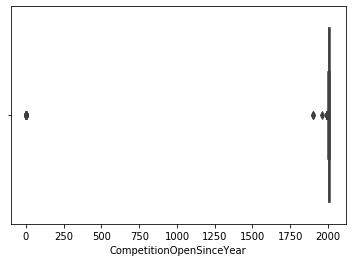

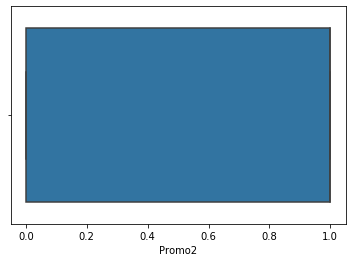

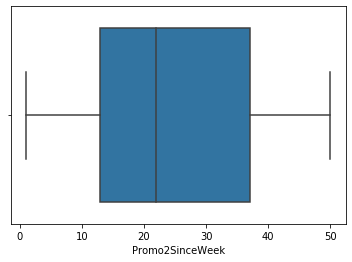

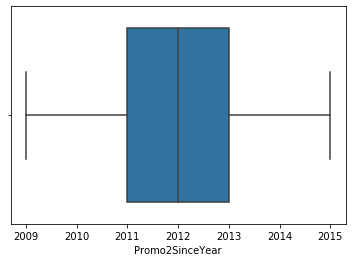

In [23]:
#   b. Quartiles
# (usando boxplot)
colsNumericas = newDf.select_dtypes(include=[np.number])
for col in colsNumericas:
    sb.boxplot(x=col,data=newDf)
    plt.show()

----------------- Scatter plot con seaborn -----------


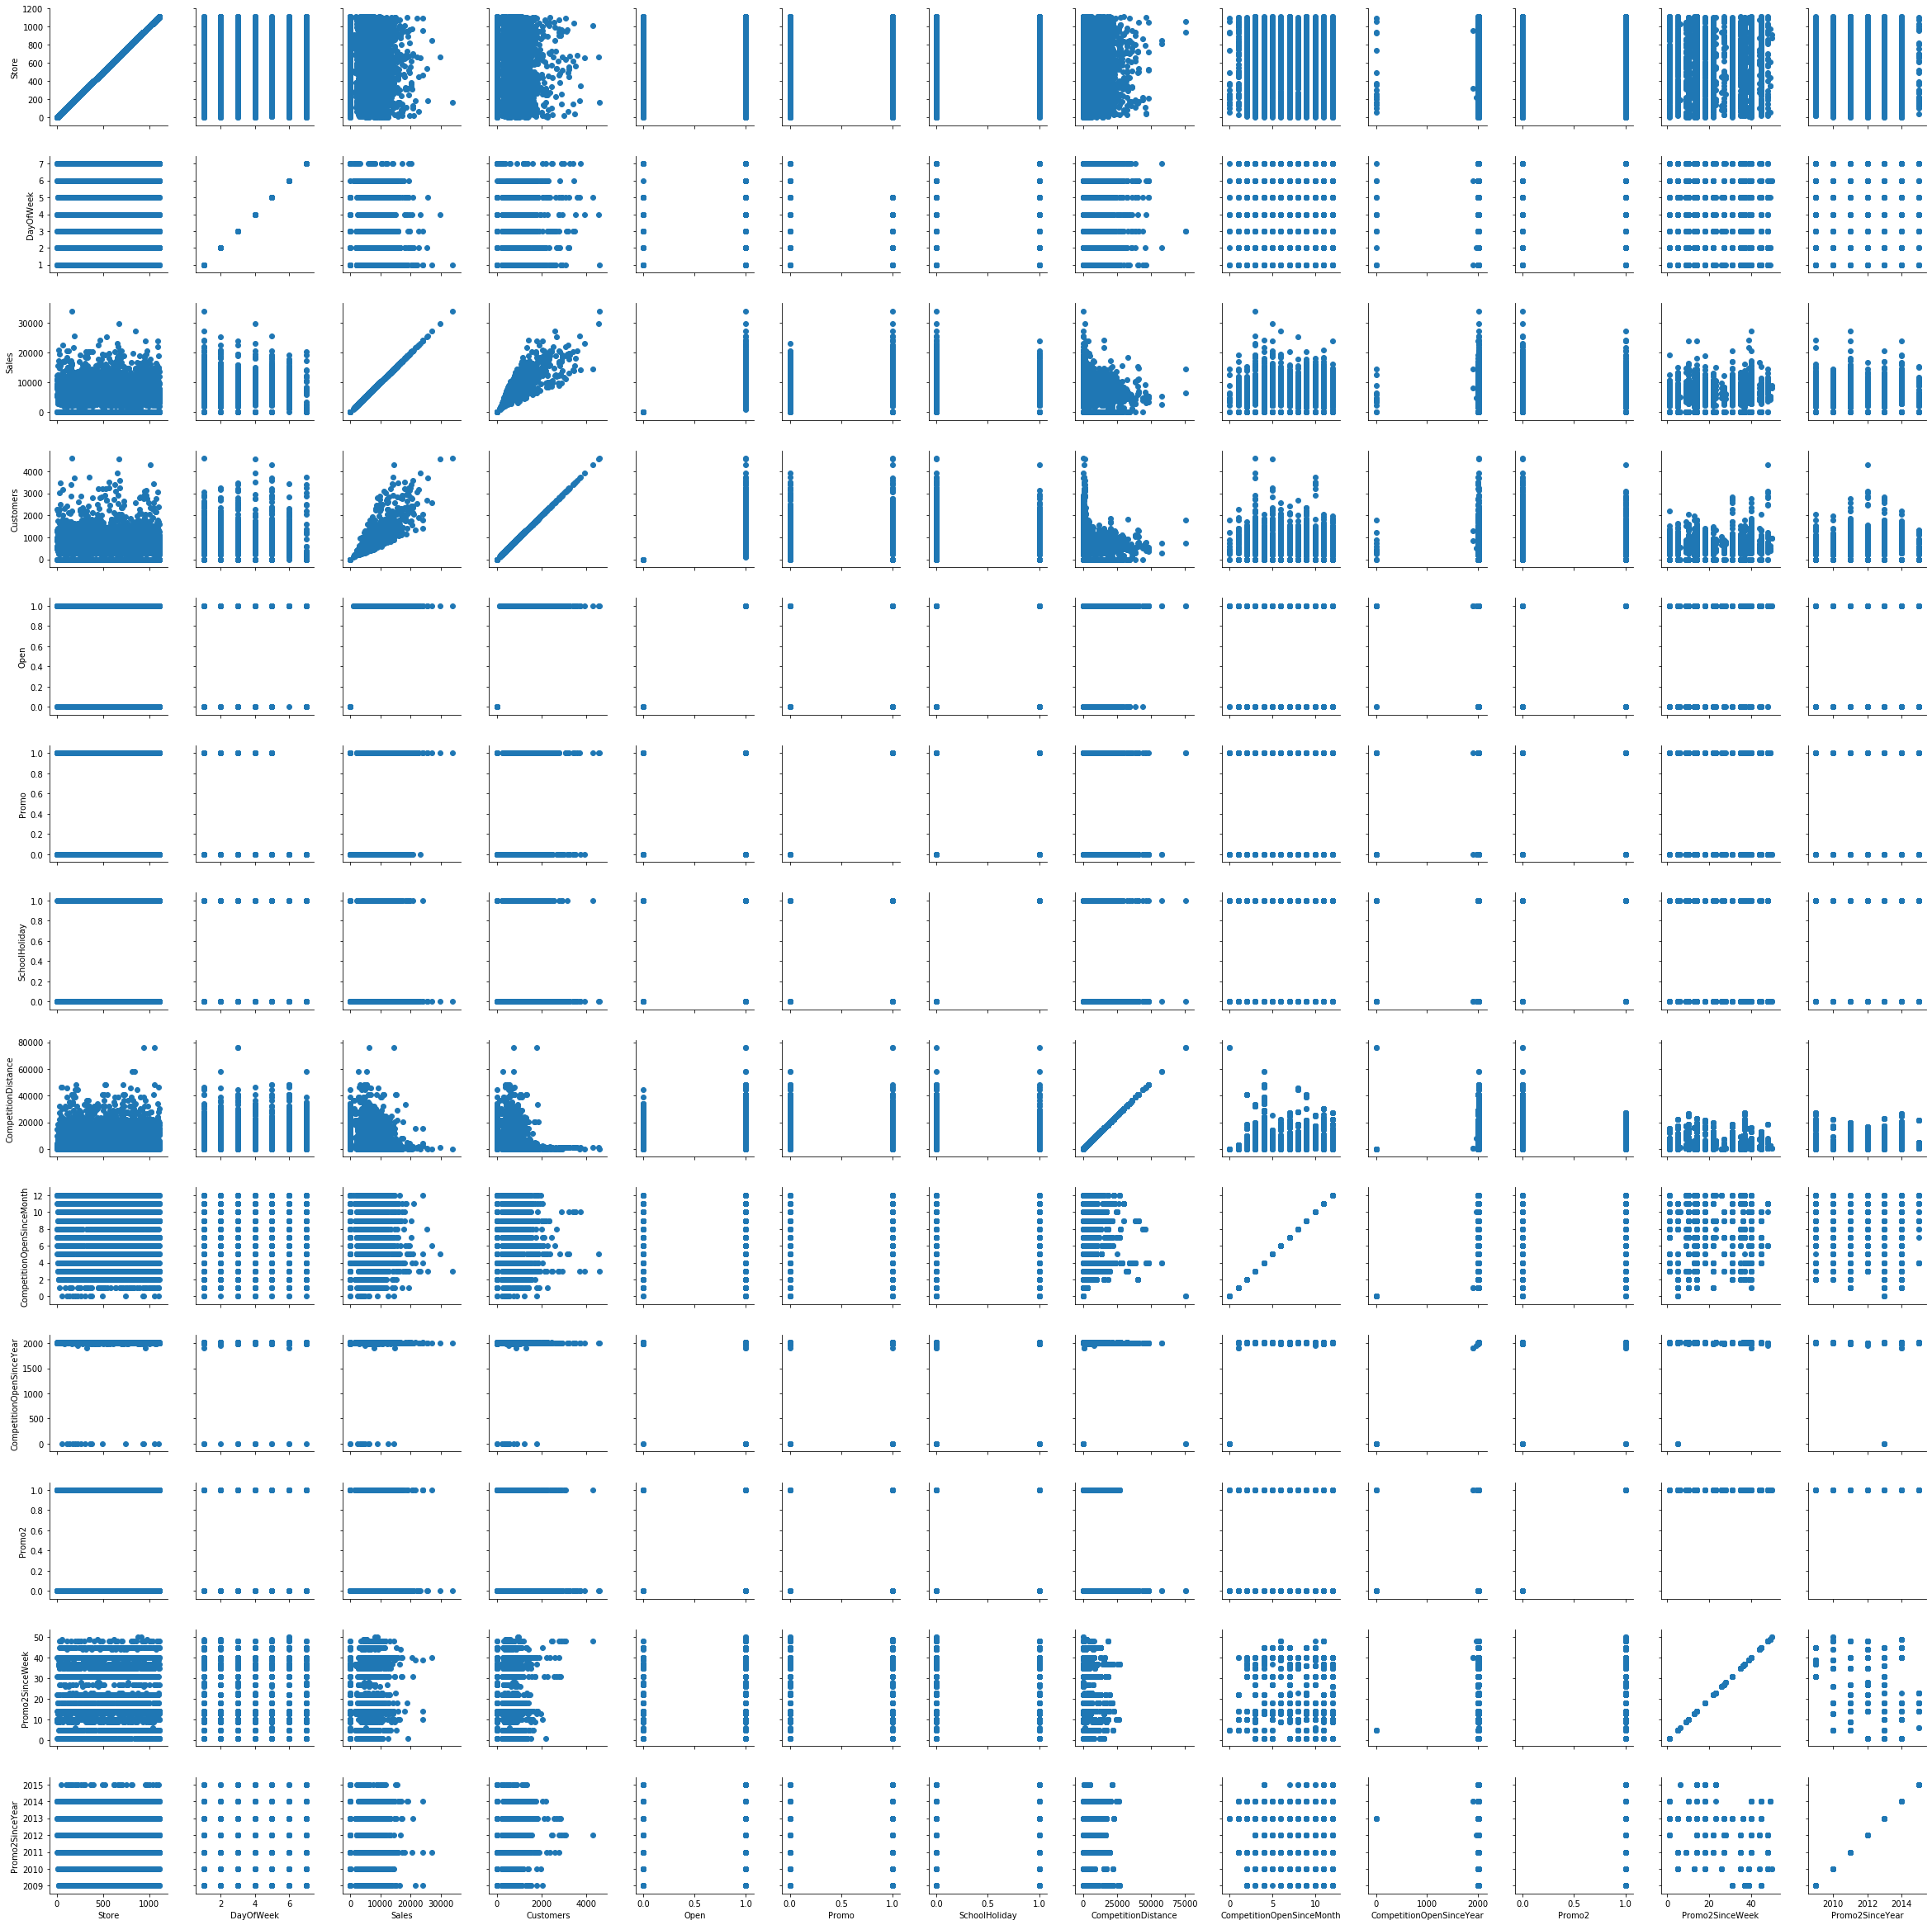

In [11]:
newDf['CompetitionOpenSinceYear'].unique()

array([   0., 2013., 2008., 2002., 2012.,   nan, 2010., 2014., 2005.,
       2004., 1999., 2011., 2015., 2007., 2006., 2009., 2001., 2000.,
       2003., 1994., 1961., 1995., 1990., 1900., 1998.])

Store


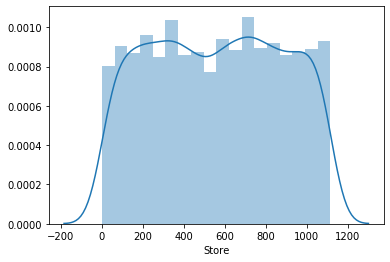

DayOfWeek


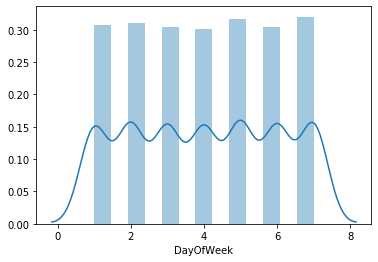

Sales


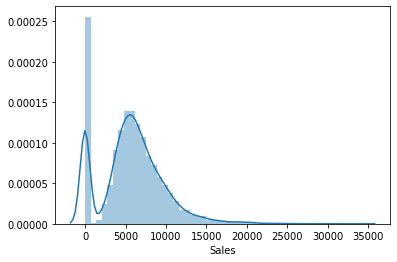

Customers


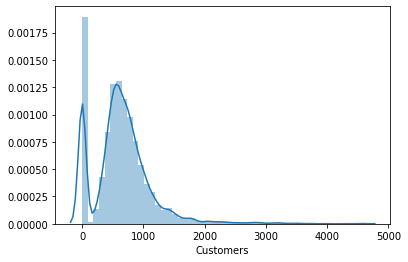

Open


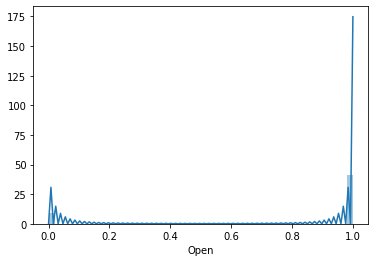

Promo


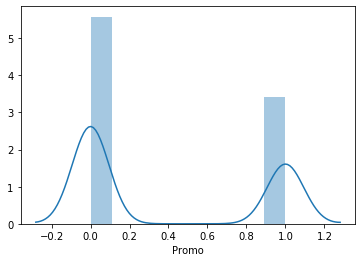

SchoolHoliday


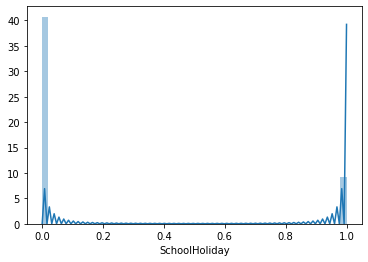

CompetitionDistance


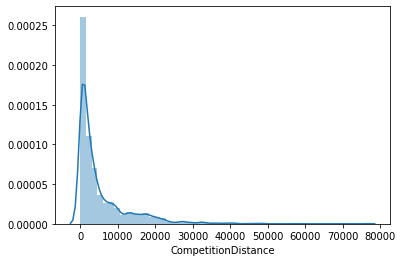

Promo2


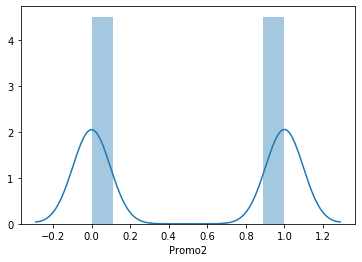

In [12]:
# Gráficos de distribucion
for col in colsNumericas:
    if missing_data.loc[col]['Total'] == 0:
        print(col)
        sb.distplot(newDf[col])
        plt.show()
    # else: tal vez realizar un ajuste para darle valor numerico


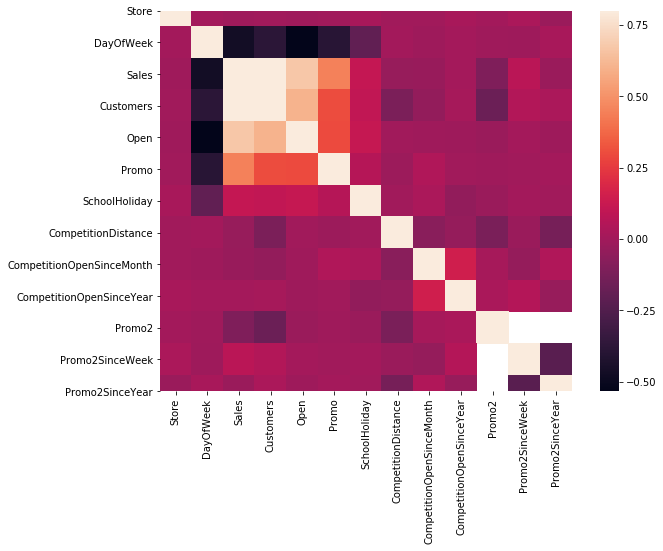

In [13]:
# Heartmaps
corrmat = newDf.corr()
f, ax = plt.subplots(figsize=(10, 7))
sb.heatmap(corrmat, vmax=.8, square=True);

### 6. Obtenga la matriz de correlación de las variables numéricas e identifique si algunas se pudieran quitar.

In [14]:
numeric_columns = newDf.select_dtypes(include=[np.number])
numeric_columns.describe()

Store    DayOfWeek         Sales    Customers         Open  \
count  5000.000000  5000.000000   5000.000000  5000.000000  5000.000000   
mean    560.837600     4.017400   5793.839800   640.919400     0.826000   
std     319.748197     2.008159   3942.027305   486.002465     0.379147   
min       1.000000     1.000000      0.000000     0.000000     0.000000   
25%     285.000000     2.000000   3674.000000   402.000000     1.000000   
50%     569.000000     4.000000   5738.500000   607.000000     1.000000   
75%     833.250000     6.000000   7895.250000   845.000000     1.000000   
max    1115.000000     7.000000  34001.000000  4589.000000     1.000000   

             Promo  SchoolHoliday  CompetitionDistance  \
count  5000.000000    5000.000000          5000.000000   
mean      0.380400       0.185400          5346.830000   
std       0.485534       0.388661          7363.726322   
min       0.000000       0.000000             0.000000   
25%       0.000000       0.000000           720.000000   
50%       0.000000       0.000000          2320.000000   
75%       1.000000       0.000000          6890.000000   
max       1.000000       1.000000         75860.000000   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear      Promo2  \
count                3471.000000               3471.000000  5000.00000   
mean                    7.214059               1999.486027     0.50060   
std                     3.235607                136.183978     0.50005   
min                     0.000000                  0.000000     0.00000   
25%                     4.000000               2006.000000     0.00000   
50%                     8.000000               2009.000000     1.00000   
75%                    10.000000               2012.000000     1.00000   
max                    12.000000               2015.000000     1.00000   

       Promo2SinceWeek  Promo2SinceYear  
count      2503.000000      2503.000000  
mean         23.469437      2011.763084  
std          14.025491         1.658554  
min           1.000000      2009.000000  
25%          13.000000      2011.000000  
50%          22.000000      2012.000000  
75%          37.000000      2013.000000  
max          50.000000      2015.000000

In [15]:
df_numerics_only = dtset.select_dtypes(include=[np.number])
df_numerics_only.head()

correlated_features = set()  
correlation_matrix = df_numerics_only.corr()

for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8: # variables con alta correlacion
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print( len(correlated_features) )

print(correlated_features)

df_prueba = dtset
df_prueba.drop(labels=correlated_features, axis=1, inplace=True)

df_prueba.head(20)

1
{'Customers'}


Store  DayOfWeek      Date  Sales  Open  Promo StateHoliday  \
0     107          6   5/23/15   3918     1      0            0   
1     492          3    6/5/13   8856     1      1            0   
2      57          1  12/30/13   5940     1      0            0   
3     260          5    1/2/15   4311     1      0            0   
4     932          4    4/4/13   3294     1      0            0   
5     199          4  10/23/14   3852     1      1            0   
6     139          5  10/31/14      0     0      0            a   
7     171          6   7/26/14   2389     1      0            0   
8     743          2   2/17/15   4854     1      1            0   
9     358          7    2/3/13      0     0      0            0   
10    307          1    7/7/14   3908     1      0            0   
11    228          4   8/14/14   3770     1      0            0   
12    379          1   4/28/14  12634     1      1            0   
13   1099          4  12/12/13   3674     1      0            0   
14    940          3    8/6/14  14454     1      1            0   
15   1055          3    3/5/14   6376     1      1            0   
16    845          2  10/14/14   5399     1      0            0   
17    816          7  12/21/14   2583     1      0            0   
18    721          5    2/6/15   5424     1      1            0   
19    527          5   7/24/15   5368     1      0            0   

    SchoolHoliday StoreType Assortment  CompetitionDistance  \
0               0         d          a                    0   
1               0         d          a                    0   
2               1         a          c                    0   
3               1         a          c                    0   
4               1         d          a                    0   
5               1         a          c                    0   
6               1         d          a                    0   
7               0         a          c                    0   
8               0         a          c                    0   
9               0         d          a                    0   
10              0         a          c                    0   
11              1         a          c                    0   
12              0         d          a                    0   
13              0         d          a                    0   
14              1         a          c                75860   
15              0         a          c                75860   
16              1         a          c                58260   
17              0         a          c                58260   
18              0         d          a                48330   
19              1         d          a                48330   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                         0.0                       0.0       1   
1                         0.0                       0.0       0   
2                         0.0                       0.0       0   
3                         0.0                       0.0       0   
4                         0.0                       0.0       1   
5                         0.0                       0.0       0   
6                         0.0                       0.0       0   
7                         0.0                       0.0       0   
8                         0.0                       0.0       0   
9                         0.0                       0.0       1   
10                        0.0                       0.0       0   
11                        0.0                       0.0       0   
12                        0.0                       0.0       0   
13                        0.0                       0.0       1   
14                        0.0                       0.0       0   
15                        0.0                       0.0       0   
16                        4.0                    2013.0       0   
17                        4.0                    2013.0       0   

### 7. El atributo Competition distance tiene 9999 como null, cambie este valor por el que considere se adecua más a este campo (i.e. media, mediana, algún otro)

In [16]:
dtset['CompetitionDistance'][dtset['CompetitionDistance'] > 9999].count()
cv = dtset.copy()
dtset['CompetitionDistance'][dtset['CompetitionDistance'] == 9999].count()
cv['CompetitionDistance'][cv['CompetitionDistance'] == 9999].map({ 9999: cv['CompetitionDistance'].median() })
cv['CompetitionDistance'][cv['CompetitionDistance'] == cv['CompetitionDistance'].median()]

2509    2320
2510    2320
2511    2320
2512    2320
2513    2320
2514    2320
2515    2320
2516    2320
Name: CompetitionDistance, dtype: int64

### 8. Mapear Day of Week con los días en literal.

In [17]:
cv['DayOfWeek'].unique()
dias = { 
    1: 'Domingo',
    2: 'Lunes',
    3: 'Martes',
    4: 'Miercoles',
    5: 'Jueves',
    6: 'Viernes',
    7: 'Sábado'
}
cv['DayOfWeek'].map(dias)

0         Viernes
1          Martes
2         Domingo
3          Jueves
4       Miercoles
          ...    
4995       Martes
4996        Lunes
4997      Viernes
4998      Viernes
4999       Martes
Name: DayOfWeek, Length: 5000, dtype: object

### 10. Mapear el atributo CompetitionOpenSinceMonth con los meses del año en literal y rellenar los valores faltantes “?” con el mes que tenga la mayor frecuencia.

Mes con mas frecuencia 9.0 con 573
0    Enero
1    Enero
2    Enero
3    Enero
4    Enero
5    Enero
6    Enero
7    Enero
8    Enero
9    Enero
Name: CompetitionOpenSinceMonth, dtype: object
4990     Agosto
4991       Mayo
4992     Agosto
4993       Mayo
4994     Agosto
4995     Agosto
4996    Octubre
4997    Octubre
4998    Octubre
4999    Octubre
Name: CompetitionOpenSinceMonth, dtype: object


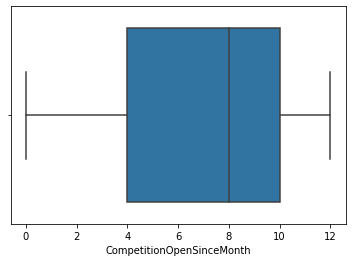

In [18]:
dtset['CompetitionOpenSinceMonth'].unique()
# Obteniendo el mes con mayor frecuenca
dtset['CompetitionOpenSinceMonth'].describe()
sb.boxplot(x='CompetitionOpenSinceMonth',data=dtset)
dic = {}
for mes in dtset['CompetitionOpenSinceMonth'].unique():
    dic[mes] = dtset['CompetitionOpenSinceMonth'][dtset['CompetitionOpenSinceMonth'] == mes].count()
n = 0
mesMasFrecuencia = 0
for k,v in dic.items():
    if v > n:
        n = v
        mesMasFrecuencia = k
print('Mes con mas frecuencia', mesMasFrecuencia,'con', n)
meses = { 
    0.: 'Enero',
    1.: 'Febrero',
    2.: 'Marzo',
    3.: 'Abril',
    4.: 'Mayo',
    5.: 'Junio',
    6.: 'Julio',
    7.: 'Agosto',
    8.: 'Septiembre',
    9.: 'Octubre',
    10.: 'Noviembre',
    11.: 'Diciembre'
}
cv = dtset.copy()
cv['CompetitionOpenSinceMonth'].replace(np.NaN, mesMasFrecuencia, inplace=True)
#cv['CompetitionOpenSinceMonth'].unique()
cv['CompetitionOpenSinceMonth'] = cv['CompetitionOpenSinceMonth'].map(meses)
print(cv['CompetitionOpenSinceMonth'].head(10))
print(cv['CompetitionOpenSinceMonth'].tail(10))

### 11. Identifique atributos que no serían de utilidad por su nivel de variación, si hubiera. Usted identifique su nivel de utilidad, dando razones para ello.

In [19]:
df_numerics_only = cv.select_dtypes(include=[np.number])
df_numerics_only.describe()
#for col in df_numerics_only.columns:
#    print(col)
#    print

Store    DayOfWeek         Sales         Open        Promo  \
count  5000.000000  5000.000000   5000.000000  5000.000000  5000.000000   
mean    560.837600     4.017400   5793.839800     0.826000     0.380400   
std     319.748197     2.008159   3942.027305     0.379147     0.485534   
min       1.000000     1.000000      0.000000     0.000000     0.000000   
25%     285.000000     2.000000   3674.000000     1.000000     0.000000   
50%     569.000000     4.000000   5738.500000     1.000000     0.000000   
75%     833.250000     6.000000   7895.250000     1.000000     1.000000   
max    1115.000000     7.000000  34001.000000     1.000000     1.000000   

       SchoolHoliday  CompetitionDistance  CompetitionOpenSinceYear  \
count    5000.000000          5000.000000               3471.000000   
mean        0.185400          5346.830000               1999.486027   
std         0.388661          7363.726322                136.183978   
min         0.000000             0.000000                  0.000000   
25%         0.000000           720.000000               2006.000000   
50%         0.000000          2320.000000               2009.000000   
75%         0.000000          6890.000000               2012.000000   
max         1.000000         75860.000000               2015.000000   

           Promo2  Promo2SinceWeek  Promo2SinceYear  
count  5000.00000      2503.000000      2503.000000  
mean      0.50060        23.469437      2011.763084  
std       0.50005        14.025491         1.658554  
min       0.00000         1.000000      2009.000000  
25%       0.00000        13.000000      2011.000000  
50%       1.00000        22.000000      2012.000000  
75%       1.00000        37.000000      2013.000000  
max       1.00000        50.000000      2015.000000

Store
count    5000.000000
mean      560.837600
std       319.748197
min         1.000000
25%       285.000000
50%       569.000000
75%       833.250000
max      1115.000000
Name: Store, dtype: float64


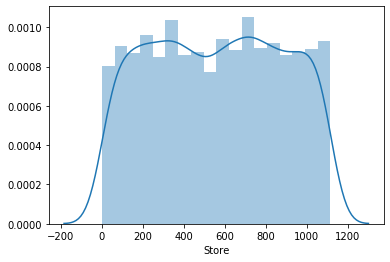

DayOfWeek
count    5000.000000
mean        4.017400
std         2.008159
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         7.000000
Name: DayOfWeek, dtype: float64


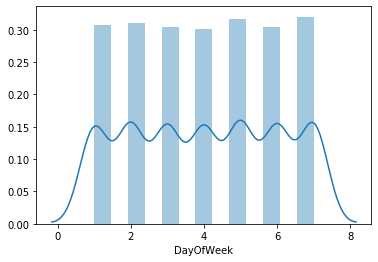

Sales
count     5000.000000
mean      5793.839800
std       3942.027305
min          0.000000
25%       3674.000000
50%       5738.500000
75%       7895.250000
max      34001.000000
Name: Sales, dtype: float64


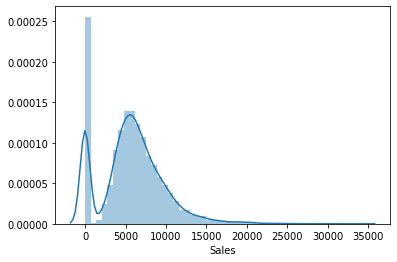

Open
count    5000.000000
mean        0.826000
std         0.379147
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Open, dtype: float64


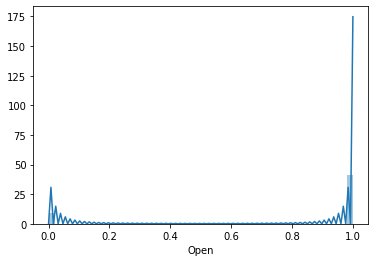

✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕
 Se elimina la columna: Open
Cuantiles .25 .5 .75: 1.0 1.0 1.0

Promo
count    5000.000000
mean        0.380400
std         0.485534
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Promo, dtype: float64


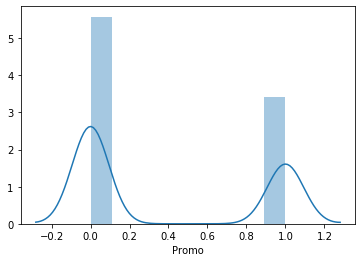

SchoolHoliday
count    5000.000000
mean        0.185400
std         0.388661
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SchoolHoliday, dtype: float64


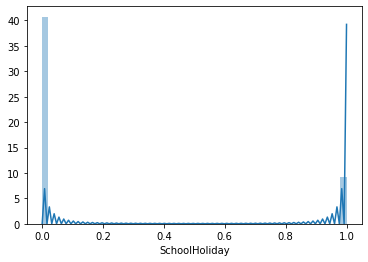

✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕
 Se elimina la columna: SchoolHoliday
Cuantiles .25 .5 .75: 0.0 0.0 0.0

CompetitionDistance
count     5000.000000
mean      5346.830000
std       7363.726322
min          0.000000
25%        720.000000
50%       2320.000000
75%       6890.000000
max      75860.000000
Name: CompetitionDistance, dtype: float64


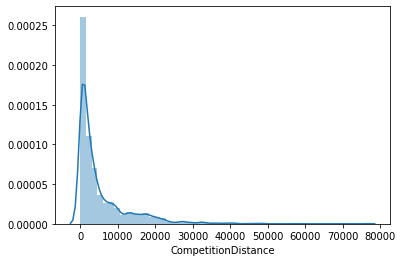

CompetitionOpenSinceYear
count    3471.000000
mean     1999.486027
std       136.183978
min         0.000000
25%      2006.000000
50%      2009.000000
75%      2012.000000
max      2015.000000
Name: CompetitionOpenSinceYear, dtype: float64
No se pudo graficar cannot convert float NaN to integer
Promo2
count    5000.00000
mean        0.50060
std         0.50005
min         0.00000
25%         0.00000
50%         1.00000
75%         1.00000
max         1.00000
Name: Promo2, dtype: float64


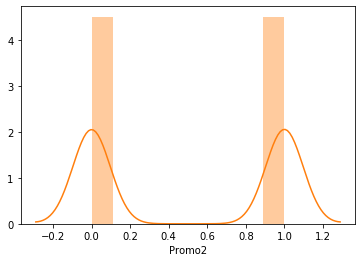

Promo2SinceWeek
count    2503.000000
mean       23.469437
std        14.025491
min         1.000000
25%        13.000000
50%        22.000000
75%        37.000000
max        50.000000
Name: Promo2SinceWeek, dtype: float64
No se pudo graficar cannot convert float NaN to integer
Promo2SinceYear
count    2503.000000
mean     2011.763084
std         1.658554
min      2009.000000
25%      2011.000000
50%      2012.000000
75%      2013.000000
max      2015.000000
Name: Promo2SinceYear, dtype: float64
No se pudo graficar cannot convert float NaN to integer


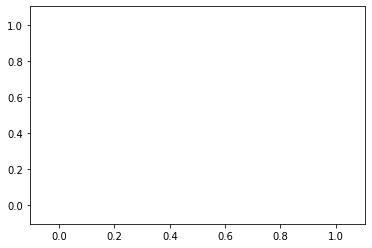

In [20]:
df_numerics_only = cv.select_dtypes(include=[np.number])
# analizando las columnas por su "bajo nivel de variacion"
columnas_a_eliminar = []
for col in df_numerics_only.columns:
    print(col)
    print(cv[col].describe())
    #print(cv[col].quantile(.25), cv[col].quantile(.50), cv[col].quantile(.75))
    try:
        sb.distplot(df_numerics_only[col])
        plt.show()
    except Exception as e:
        print('No se pudo graficar', e)
    # usando el criterio de la distribucion de los cuantiles .25 .5 y .75 es igual
    # significa que los datos son mayormente del mismo valor y casi no hay variacion
    if cv[col].quantile(.25) == cv[col].quantile(.5)  and cv[col].quantile(.5) == cv[col].quantile(.75):
        columnas_a_eliminar.append(col)
        print('✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕✕')
        print(' Se elimina la columna:', col)
        print('Cuantiles .25 .5 .75:', cv[col].quantile(.25), cv[col].quantile(.50), cv[col].quantile(.75))
        print()

### 12. Identifique los campos que tienen valores faltantes y decida como reemplazarlos, haciendo un análisis en cada caso.


In [21]:
cv['CompetitionOpenSinceYear'][cv['CompetitionOpenSinceYear'].isnull()]

columnas_con_faltantes = []
# identificando columnas con valores faltantes
for col in df_numerics_only.columns:
    if cv[col].isnull().any():
        columnas_con_faltantes.append(col)
columnas_con_faltantes
# analizando cada caso
for col in columnas_con_faltantes:
    print()
    print(col,'****', 'valores unicos:',len(cv[col].unique()))
    print(' Valores nulos:', len(cv[col][cv[col].isnull()]))
    print(cv[col].describe())
    # rellenando con la media en caso de que la desviacion estandar sea baja
    if ((cv[col].std()*100)/(cv[col].mean())<= 0.15):
        cv[col].replace(np.NaN, cv[col].mean(), inplace=True)
        print(' -> Reemplazando Faltantes por la media:', cv[col].mean())


CompetitionOpenSinceYear **** valores unicos: 25
 Valores nulos: 1529
count    3471.000000
mean     1999.486027
std       136.183978
min         0.000000
25%      2006.000000
50%      2009.000000
75%      2012.000000
max      2015.000000
Name: CompetitionOpenSinceYear, dtype: float64

Promo2SinceWeek **** valores unicos: 25
 Valores nulos: 2497
count    2503.000000
mean       23.469437
std        14.025491
min         1.000000
25%        13.000000
50%        22.000000
75%        37.000000
max        50.000000
Name: Promo2SinceWeek, dtype: float64

Promo2SinceYear **** valores unicos: 8
 Valores nulos: 2497
count    2503.000000
mean     2011.763084
std         1.658554
min      2009.000000
25%      2011.000000
50%      2012.000000
75%      2013.000000
max      2015.000000
Name: Promo2SinceYear, dtype: float64
 -> Reemplazando Faltantes por la media: 2011.7630842988078


In [22]:
df_numerics_only = cv.select_dtypes(include=[np.number])

columnas_con_faltantes = []
# identificando columnas con valores faltantes
for col in df_numerics_only.columns:
    if cv[col].isnull().any():
        columnas_con_faltantes.append(col)
columnas_con_faltantes
# analizando cada caso
for col in columnas_con_faltantes:
    print()
    print(col,'****', 'valores unicos:',len(cv[col].unique()))
    print(' Valores nulos:', len(cv[col][cv[col].isnull()]))
    print(cv[col].describe())
    
    # Suppose we wish to remove those that are constant in at least 80% of the instances
    try:
        variance_filter = VarianceThreshold(threshold=(.8 * (1 - .8)))
        df_numerics_only.dropna()
        print(variance_filter.fit(df_numerics_only))
    except Exception as e:
        print(col)
        print('Error:',e)
    
    # rellenando con la media en caso de que la desviacion estandar sea baja
    #cv[col].replace(np.NaN, cv[col].mean(), inplace=True)
    #print(' -> Reemplazando Faltantes por la media:', cv[col].mean())

df_numerics_only['CompetitionOpenSinceYear']
df_numerics_only.info()


CompetitionOpenSinceYear **** valores unicos: 25
 Valores nulos: 1529
count    3471.000000
mean     1999.486027
std       136.183978
min         0.000000
25%      2006.000000
50%      2009.000000
75%      2012.000000
max      2015.000000
Name: CompetitionOpenSinceYear, dtype: float64
CompetitionOpenSinceYear
Error: name 'VarianceThreshold' is not defined

Promo2SinceWeek **** valores unicos: 25
 Valores nulos: 2497
count    2503.000000
mean       23.469437
std        14.025491
min         1.000000
25%        13.000000
50%        22.000000
75%        37.000000
max        50.000000
Name: Promo2SinceWeek, dtype: float64
Promo2SinceWeek
Error: name 'VarianceThreshold' is not defined
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Store                       5000 non-null int64
DayOfWeek                   5000 non-null int64
Sales                       5000 non-null int64
Open                        5000 non-null int64
Promo       